In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [12]:
file_path = 'waterQuality.csv'
# file_path = 'ToyotaCorolla.csv'


In [5]:
df = pd.read_csv(file_path)


In [6]:

df.replace('#NUM!', np.nan, inplace=True)


In [7]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,0.08,7.94,0.08,0.68,0.060,0.19,0.06,0.76,1.05,0.00,...,0.185,14.12,2.26,0.003,0.49,0.57,0.05,0.05,0.07,0
5000,0.00,3.15,0.05,0.08,0.020,0.50,0.10,1.71,0.80,0.00,...,0.176,17.08,1.94,0.006,0.47,2.19,0.01,0.03,0.01,0
5001,0.04,0.19,0.07,0.33,0.030,0.13,0.04,1.68,0.76,0.00,...,0.163,5.45,1.83,0.002,0.10,0.81,0.03,0.01,0.08,0
5002,0.08,9.62,0.07,0.62,0.100,0.07,0.10,1.86,0.26,0.00,...,0.013,2.72,1.26,0.008,3.77,0.82,0.03,0.07,0.05,0


In [8]:
numeric_columns = df.select_dtypes(include='number')
mean = numeric_columns.mean()
median = numeric_columns.median()
mode = numeric_columns.mode().iloc[0]
variance = numeric_columns.var()
std_deviation = numeric_columns.std()
print("\nMean:\n", mean)
print("Median:\n", median)
print("Mode:\n", mode)
print("Variance:\n", variance)
print("Standard Deviation:\n", std_deviation)



Mean:
 aluminium       0.244263
arsenic         0.140884
barium          1.283465
cadmium         0.049544
chloramine      1.323623
chromium        0.162030
copper          0.730588
flouride        0.772124
bacteria        0.335518
viruses         0.369403
lead            0.097864
nitrates        9.864055
nitrites        1.176147
mercury         0.005186
perchlorate    10.957128
radium          2.305987
selenium        0.049578
silver          0.104778
uranium         0.044720
dtype: float64
Median:
 aluminium       0.060
arsenic         0.060
barium          0.870
cadmium         0.050
chloramine      0.210
chromium        0.070
copper          0.620
flouride        0.770
bacteria        0.260
viruses         0.009
lead            0.101
nitrates       10.070
nitrites        1.270
mercury         0.005
perchlorate     4.160
radium          1.545
selenium        0.050
silver          0.060
uranium         0.050
dtype: float64
Mode:
 aluminium      0.090
arsenic        0.040
barium     

In [71]:
def calculate_iqr_and_zscore(column):
 Q1 = column.quantile(0.25)
 Q3 = column.quantile(0.75)
 IQR = Q3 - Q1
 z_scores = stats.zscore(column.dropna())
 return IQR, z_scores


In [72]:
calculate_iqr_and_zscore(numeric_columns)

(aluminium       0.0600
 arsenic         0.0600
 barium          1.4825
 cadmium         0.0600
 chloramine      1.1300
 chromium        0.0600
 copper          1.2600
 flouride        0.7500
 bacteria        0.6200
 viruses         0.7360
 lead            0.1020
 nitrates        9.6125
 nitrites        1.0400
 mercury         0.0050
 perchlorate    10.3025
 radium          3.0400
 selenium        0.0500
 silver          0.0700
 uranium         0.0500
 dtype: float64,
       aluminium   arsenic    barium   cadmium  chloramine  chromium    copper  \
 0      1.880574 -0.442182  1.393616 -1.275303   -0.442898  2.950939 -0.850404   
 1      2.776890 -0.573674  1.802840 -1.425184    1.799742  2.288273 -0.107080   
 2      1.024392 -0.442182 -0.625815 -1.245327    1.326650  1.625607 -1.077953   
 3      1.492616 -0.442182  1.491474 -1.455160    2.686790 -0.583280  1.409907   
 4      0.903991 -0.486012 -0.963869 -1.305279    0.612462  2.332451 -0.243609   
 ...         ...       ...       ..

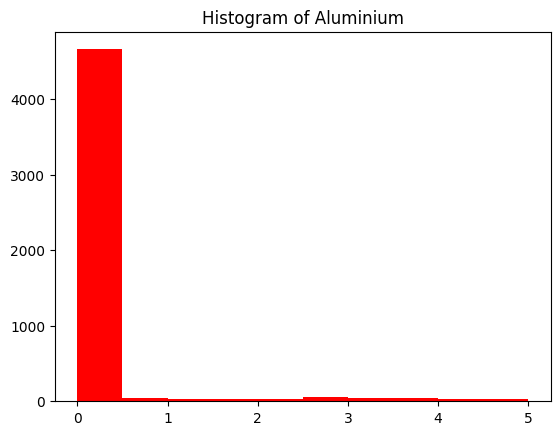

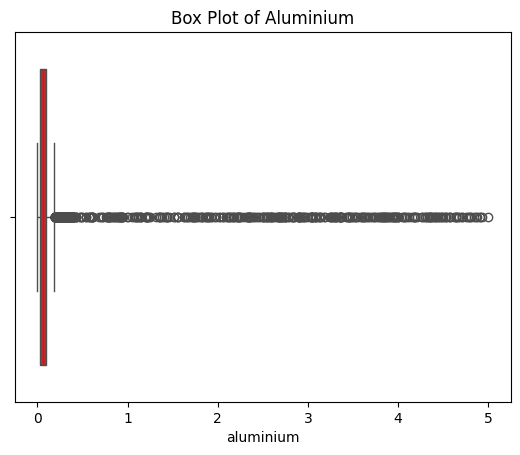

In [14]:
plt.hist(df['aluminium'],color='red')
plt.title('Histogram of Aluminium')
plt.show()
# Box plot example (for 'aluminium')
sns.boxplot(x=df['aluminium'] ,color='red')
plt.title('Box Plot of Aluminium')
plt.show()


In [ ]:
df_filled = df.fillna(numeric_columns.mean())
print("\nData after filling missing values:\n", df_filled.head())
# # g) Find Pearson and Spearman correlation
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')
print("\nPearson Correlation Matrix:\n", pearson_corr)
print("\nSpearman Correlation Matrix:\n", spearman_corr)
# # h) Display the correlation matrix using a heatmap
sns.heatmap(pearson_corr, annot=True)
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()